In [1]:
import pandas as pd

In [2]:
import re

def clean_cell_line_name(name):
    cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', str(name))  # 移除非字母数字字符
    uppercased_name = cleaned_name.upper()  # 将所有字符转换为大写
    return uppercased_name

In [3]:
# 读取CCLE model文件
df_model = pd.read_csv('../data/Model.csv')
# 将CellLineName这一列所有单元，进行规范化处理
df_model['StrippedCellLineName'] = df_model['StrippedCellLineName'].apply(clean_cell_line_name)
# 对比一下CellLineName列和StrippedCellLineName列，是不是完全相同，把不同的找出来，打印出来
# flg = df_model[df_model['CellLineName']!=df_model['StrippedCellLineName']]
# print(flg)
print(df_model.shape)
df_model.head()

(1864, 30)


,ModelID,PatientID,CellLineName,StrippedCellLineName,Age,SourceType,SangerModelID,RRID,DepmapModelType,AgeCategory,...,PublicComments,WTSIMasterCellID,EngineeredModel,TreatmentStatus,OnboardedMedia,PlateCoating,OncotreeCode,OncotreeSubtype,OncotreePrimaryDisease,OncotreeLineage
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,60.0,Commercial,SIDM00105,CVCL_0465,HGSOC,Adult,...,NaN,2201.0,NaN,NaN,MF-001-041,NaN,HGSOC,High-Grade Serous Ovarian Cancer,Ovarian Epithelial Tumor,Ovary/Fallopian Tube
1,ACH-000002,PT-5qa3uk,HL-60,HL60,36.0,Commercial,SIDM00829,CVCL_0002,AML,Adult,...,NaN,55.0,NaN,NaN,MF-005-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
2,ACH-000003,PT-puKIyc,CACO2,CACO2,72.0,Commercial,SIDM00891,CVCL_0025,COAD,Adult,...,NaN,NaN,NaN,Unknown,MF-015-009,NaN,COAD,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Bowel
3,ACH-000004,PT-q4K2cp,HEL,HEL,30.0,Commercial,SIDM00594,CVCL_0001,AML,Adult,...,NaN,783.0,NaN,Post-treatment,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,30.0,Commercial,SIDM00593,CVCL_2481,AML,Adult,...,NaN,NaN,NaN,NaN,MF-001-001,NaN,AML,Acute Myeloid Leukemia,Acute Myeloid Leukemia,Myeloid


In [4]:
# 取StrippedCellLineName列、ModelID列和OncotreeCode列
df_model = df_model[['StrippedCellLineName', 'ModelID', 'OncotreeCode']]
df_model.head()

,StrippedCellLineName,ModelID,OncotreeCode
0,NIHOVCAR3,ACH-000001,HGSOC
1,HL60,ACH-000002,AML
2,CACO2,ACH-000003,COAD
3,HEL,ACH-000004,AML
4,HEL9217,ACH-000005,AML


In [5]:
df_cell_blind = pd.read_csv('../data/drug_sensitivity_CellBlind_test&prediction.csv')
df_cell_blind.head()

,Unnamed: 0,drug,cell_line,IC50,prediction
0,0,5-Fluorouracil,PC14,4.138791,5.553128
1,1,5-azacytidine,PC14,2.782368,4.122593
2,2,A-366,PC14,4.651003,5.387908
3,3,ABT737,PC14,2.341568,2.974360
4,4,AGI-5198,PC14,5.232588,5.088980


In [6]:
# 将df_model与df_cell_blind进行合并，合并的依据是df_model的StrippedCellLineName列和df_cell_blind的cell_line列
df_merged = pd.merge(df_cell_blind, df_model, left_on='cell_line', right_on='StrippedCellLineName')
df_merged.head()

,Unnamed: 0,drug,cell_line,IC50,prediction,StrippedCellLineName,ModelID,OncotreeCode
0,0,5-Fluorouracil,PC14,4.138791,5.553128,PC14,ACH-000030,LUAD
1,1,5-azacytidine,PC14,2.782368,4.122593,PC14,ACH-000030,LUAD
2,2,A-366,PC14,4.651003,5.387908,PC14,ACH-000030,LUAD
3,3,ABT737,PC14,2.341568,2.974360,PC14,ACH-000030,LUAD
4,4,AGI-5198,PC14,5.232588,5.088980,PC14,ACH-000030,LUAD


In [7]:
# 统计不同OncotreeCode的个数
Cancer_counts = df_merged['OncotreeCode'].value_counts()
print(Cancer_counts)

OncotreeCode
LUAD        1432
GB           653
OCSC         653
LUSC         616
IDC          440
COAD         438
UCEC         435
ESCC         434
AML          433
DLBCLNOS     431
PCM          431
SCLC         386
HGSOC        363
CCRCC        332
NBL          306
BLL          267
OS           232
BRCNOS       221
BRCA         219
IHCH         218
SOC          218
BLCA         217
CML          217
EOV          217
STAD         217
CESC         217
RCC          217
ES           216
CCOV         216
PAAD         216
ALCLALKP     216
GCB          194
RMS          180
PRSCC        179
PLBMESO      153
THME         153
MEL          153
ILC          144
Name: count, dtype: int64


In [147]:
# 取OncotreeCode中LUAD和LUSC的数据
df_Cancer_Filtered = df_merged[df_merged['OncotreeCode'].isin(['LUAD','GB','OCSC','COAD','PCM'])]
print(df_Cancer_Filtered.shape)
df_Cancer_Filtered.head()

(3607, 8)


,Unnamed: 0,drug,cell_line,IC50,prediction,StrippedCellLineName,ModelID,OncotreeCode
0,0,5-Fluorouracil,PC14,4.138791,5.553128,PC14,ACH-000030,LUAD
1,1,5-azacytidine,PC14,2.782368,4.122593,PC14,ACH-000030,LUAD
2,2,A-366,PC14,4.651003,5.387908,PC14,ACH-000030,LUAD
3,3,ABT737,PC14,2.341568,2.974360,PC14,ACH-000030,LUAD
4,4,AGI-5198,PC14,5.232588,5.088980,PC14,ACH-000030,LUAD


In [148]:
#将df_Cancer_Filtered根据cell_line分组,并且计数,并显示OncotreeCode列
df_Cancer_Filtered_counts = df_Cancer_Filtered.groupby('cell_line')['cell_line'].count().reset_index(name='counts')
# 根据cell_line列与df_model中的StrippedCellLineName列进行合并
df_Cancer_Filtered_counts = pd.merge(df_Cancer_Filtered_counts, df_model, left_on='cell_line', right_on='StrippedCellLineName')[['cell_line', 'counts', 'OncotreeCode']]
df_Cancer_Filtered_counts.head(20)

,cell_line,counts,OncotreeCode
0,42MGBA,217,GB
1,CA922,218,OCSC
2,CAL33,217,OCSC
3,COLO678,218,COAD
4,EKVX,215,LUAD
5,GAMG,218,GB
6,HCT15,220,COAD
7,KARPAS620,216,PCM
8,MM1S,215,PCM
9,NCIH1355,218,LUAD


In [149]:
# 去除df_Cancer_Filtered中cell_line列是RERFLCMS、NCIH522的数据
df_Cancer_Filtered = df_Cancer_Filtered[~df_Cancer_Filtered['cell_line'].isin(['RERFLCMS', 'NCIH522','GAMG'])]

In [150]:
# 将df_LUAD根据cell_line分组，再取每组drug列的交集
df_Cancer_Filtered_drug = df_Cancer_Filtered.groupby('cell_line')['drug'].apply(set).reset_index()
df_Cancer_Filtered_drug.head(20)


,cell_line,drug
0,42MGBA,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
1,CA922,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
2,CAL33,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
3,COLO678,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
4,EKVX,"{Entinostat, PCI-34051, AZD2014, Veliparib, BX..."
5,HCT15,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
6,KARPAS620,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
7,MM1S,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
8,NCIH1355,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."
9,NCIH1563,"{Entinostat, PCI-34051, AZD2014, Veliparib, PO..."


In [151]:
# 将df_LUAD_drug中的drug取交集
drugs = set.intersection(*df_Cancer_Filtered_drug['drug'])
print(len(drugs))
print(drugs)

132
{'Veliparib', 'Sorafenib', 'SB590885', 'AZD6738', 'YK-4-279', 'AGK2', 'Alpelisib', 'Nilotinib', 'AZD8186', 'PD0325901', 'Savolitinib', 'Talazoparib', 'BMS-536924', 'Lestaurtinib', 'Crizotinib', 'Dactolisib', 'Oxaliplatin', 'LGK974', 'Vinorelbine', 'Sepantronium bromide', 'Rapamycin', 'Camptothecin', 'Erlotinib', 'Afatinib', 'Pyridostatin', 'SN-38', 'EPZ004777', 'Ulixertinib', '5-Fluorouracil', 'Cediranib', 'MG-132', 'EPZ5676', 'Tamoxifen', 'Irinotecan', 'Sapitinib', 'AZD5363', 'Bosutinib', 'KU-55933', 'JQ1', 'AMG-319', 'AZ6102', 'MK-8776', 'Rucaparib', 'Uprosertib', 'Nutlin-3a (-)', 'Doramapimod', 'Dasatinib', 'RO-3306', 'Docetaxel', 'Vorinostat', 'GW441756', 'PD173074', 'glutathione', 'Methotrexate', 'MK-1775', 'P22077', 'Selumetinib', 'Paclitaxel', 'OSI-027', 'SGC0946', 'Epirubicin', 'Refametinib', 'Olaparib', 'Tanespimycin', 'Buparlisib', 'Navitoclax', 'Serdemetan', 'ZM447439', 'GSK1904529A', 'GSK591', 'NU7441', 'AZD7762', 'Obatoclax Mesylate', 'Osimertinib', 'Temozolomide', 'GD

In [152]:
# 取df_LUAD中drug中在drugs中的数据
df_Cancer_Filtered = df_Cancer_Filtered[df_Cancer_Filtered['drug'].isin(drugs)]
print(df_Cancer_Filtered.shape)
df_Cancer_Filtered.head()

(1848, 8)


,Unnamed: 0,drug,cell_line,IC50,prediction,StrippedCellLineName,ModelID,OncotreeCode
0,0,5-Fluorouracil,PC14,4.138791,5.553128,PC14,ACH-000030,LUAD
3,3,ABT737,PC14,2.341568,2.974360,PC14,ACH-000030,LUAD
4,4,AGI-5198,PC14,5.232588,5.088980,PC14,ACH-000030,LUAD
6,6,AGK2,PC14,3.164392,3.404567,PC14,ACH-000030,LUAD
7,7,AMG-319,PC14,5.707739,5.601388,PC14,ACH-000030,LUAD


In [153]:
# 取drug、cell_line、IC50和OncotreeCode列
df_LUAD_GB_OCSC = df_Cancer_Filtered[['drug', 'cell_line', 'prediction', 'OncotreeCode']]
df_LUAD_GB_OCSC.head()

,drug,cell_line,prediction,OncotreeCode
0,5-Fluorouracil,PC14,5.553128,LUAD
3,ABT737,PC14,2.974360,LUAD
4,AGI-5198,PC14,5.088980,LUAD
6,AGK2,PC14,3.404567,LUAD
7,AMG-319,PC14,5.601388,LUAD


In [154]:
df_drug_mean_std = pd.read_csv('../data/gdsc_drug_mean_std.csv')
df_drug_mean_std.head()

,Drug_Name,IC50_mean,IC50_std
0,123138,2.898762,0.831312
1,123829,2.586956,1.618564
2,150412,3.168315,1.088161
3,5-Fluorouracil,4.392229,1.719760
4,5-azacytidine,2.988221,1.390814


In [155]:
# 根据df_drug_mean_std中的"Drug_Name"列、"IC50_mean"列和"IC50_std"列计算出df_LUAD的Z-Score
df_LUAD_GB_OCSC = pd.merge(df_LUAD_GB_OCSC, df_drug_mean_std, left_on='drug', right_on='Drug_Name')
df_LUAD_GB_OCSC['Z-Score'] = (df_LUAD_GB_OCSC['prediction'] - df_LUAD_GB_OCSC['IC50_mean']) / df_LUAD_GB_OCSC['IC50_std']
df_LUAD_GB_OCSC.head()

,drug,cell_line,prediction,OncotreeCode,Drug_Name,IC50_mean,IC50_std,Z-Score
0,5-Fluorouracil,PC14,5.553128,LUAD,5-Fluorouracil,4.392229,1.71976,0.675035
1,5-Fluorouracil,KARPAS620,3.292372,PCM,5-Fluorouracil,4.392229,1.71976,-0.639541
2,5-Fluorouracil,42MGBA,4.060566,GB,5-Fluorouracil,4.392229,1.71976,-0.192854
3,5-Fluorouracil,COLO678,5.717366,COAD,5-Fluorouracil,4.392229,1.71976,0.770536
4,5-Fluorouracil,CAL33,4.360429,OCSC,5-Fluorouracil,4.392229,1.71976,-0.018491


In [156]:
# 使用pivot函数，将df_LUAD的drug列作为行索引，cell_line列作为列索引，prediction列作为值
df_LUAD_GB_OCSC_pivot = df_LUAD_GB_OCSC.pivot(index='drug', columns='cell_line', values='Z-Score')
df_LUAD_GB_OCSC_pivot.head()

cell_line,42MGBA,CA922,CAL33,COLO678,EKVX,HCT15,KARPAS620,MM1S,NCIH1355,NCIH1563,NCIH1648,PC14,SAS,T98G
drug,,,,,,,,,,,,,,
5-Fluorouracil,-0.192854,0.175335,-0.018491,0.770536,0.212344,-0.564556,-0.639541,-0.877210,0.610321,0.568730,0.514957,0.675035,-0.306965,-0.144307
ABT737,0.490502,0.081773,0.283397,-0.318839,0.576601,0.463788,-0.986686,-0.176738,0.581474,0.273943,0.493163,0.535142,0.615252,0.377821
AGI-5198,-0.056614,0.125337,-0.059641,0.512298,0.460231,-0.242795,-0.422229,-0.673450,0.804705,0.468313,0.568395,0.424068,0.117626,0.234276
AGK2,-0.127700,-0.176685,-0.278665,0.199642,0.324689,-0.267115,-0.596391,-0.725895,0.425062,0.281947,0.444102,0.151126,0.078627,-0.367183
AMG-319,-0.035371,0.149460,0.322791,0.848548,0.671120,0.242153,-0.173843,-0.735775,0.695800,0.670342,0.548593,0.680707,0.454502,0.327713


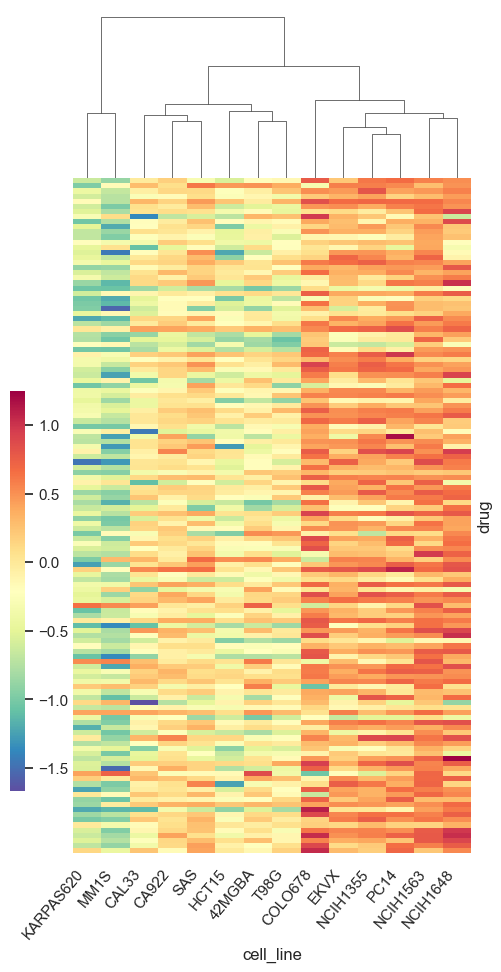

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_LUAD_GB_OCSC_pivot.columns
heatmap_data = df_LUAD_GB_OCSC_pivot.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(5,10),
                  dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False)
ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=50, horizontalalignment='right')
#设置图片名称，分辨率，并保存
# plt.savefig('cluster.tif',dpi = 300)
plt.show()